<a href="https://colab.research.google.com/github/Shamoo100/models/blob/master/End_to_End_Deep_Learning_Project_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Title: End-to-End Deep Learning Project: Image Classification with CNN
# Author: [Your Name]
# Date: [Today's Date]

# Load and Preprocess data

In [3]:
# ---
# 1. Project Overview
"""
Objective: Build a CNN model to classify images of clothing (e.g., shirts, dresses) using the Fashion MNIST dataset.
Steps:
1. Load and preprocess data
2. Build and train a CNN model
3. Evaluate performance
4. Save and deploy the model
5. Make predictions on new data
"""
# ---

'\nObjective: Build a CNN model to classify images of clothing (e.g., shirts, dresses) using the Fashion MNIST dataset.\nSteps:\n1. Load and preprocess data\n2. Build and train a CNN model\n3. Evaluate performance\n4. Save and deploy the model\n5. Make predictions on new data\n'

# Import libraries

In [4]:
# 2. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Load and Explore Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Label distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


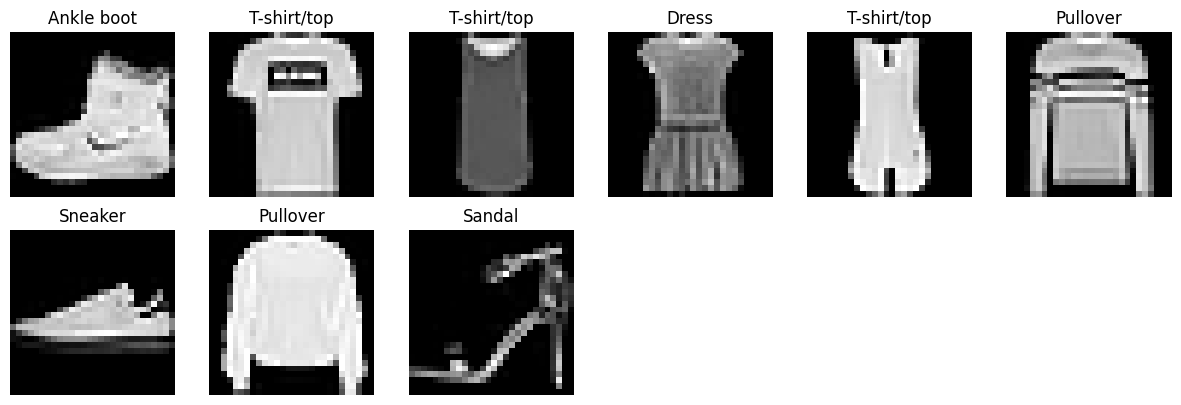

In [5]:

# ---
# 3. Load and Explore Dataset
# Load Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Dataset summary
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Label distribution: {np.unique(train_labels, return_counts=True)}")

# Visualize sample images
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(6, 6, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

# Preprocess Data

In [6]:
# ---
# 4. Preprocess Data
# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input (add channel dimension)
train_images = train_images.reshape((60000, 28, 28, 1)) #R G B
test_images = test_images.reshape((10000, 28, 28, 1))

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build CNN Model

In [7]:
# ---
# 5. Build CNN Model
def create_model():
    model = models.Sequential([
        # Feature extraction
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Classification
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train Model

In [8]:
# ---
# 6. Compile and Train Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

# ---

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7214 - loss: 0.7783 - val_accuracy: 0.8654 - val_loss: 0.3889
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8530 - loss: 0.4083 - val_accuracy: 0.8808 - val_loss: 0.3369
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8737 - loss: 0.3450 - val_accuracy: 0.8838 - val_loss: 0.3106
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8841 - loss: 0.3141 - val_accuracy: 0.8978 - val_loss: 0.2839
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8929 - loss: 0.2916 - val_accuracy: 0.8971 - val_loss: 0.2756
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8946 - loss: 0.2812 - val_accuracy: 0.8995 - val_loss: 0.2708
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9038 - loss: 0.2632 - val_accuracy: 0.9069 - val_loss: 0.2534
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9087 - loss: 0.2436 - val_accuracy: 0.

# Evaluate Performance

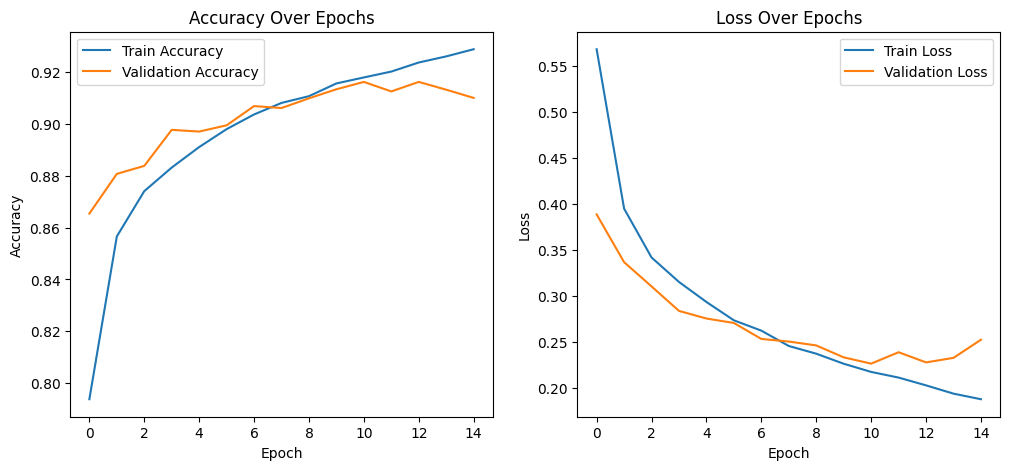


Test Accuracy: 0.9078
Test Loss: 0.2604
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.78      0.93      0.85      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.89      0.81      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.66      0.72      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



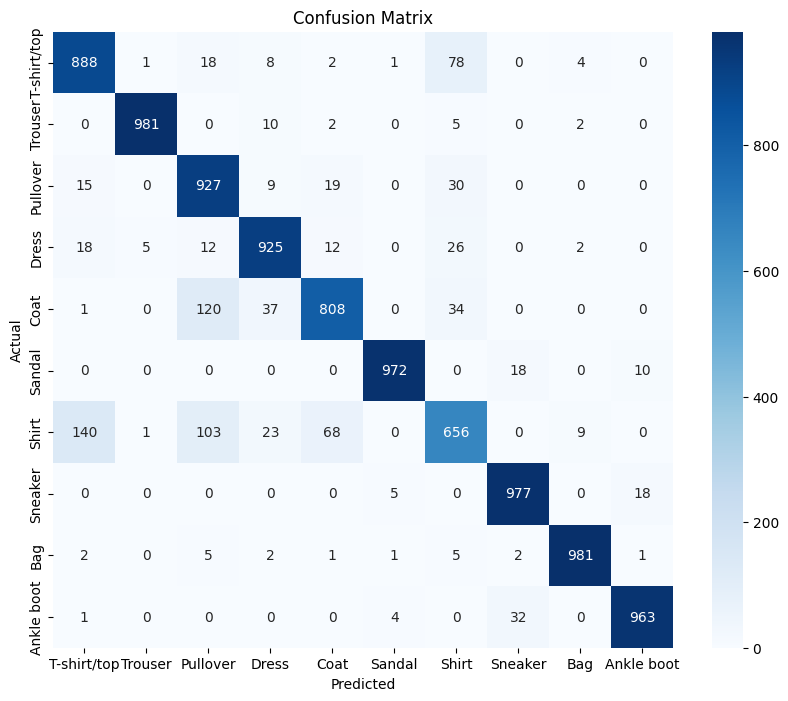

In [9]:
# 7. Evaluate Performance
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification report
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Save and Deploy Model

In [10]:
# ---
# 8. Save and Deploy Model
# Save the entire model
model.save('fashion_mnist_cnn.h5')

# Load the saved model
loaded_model = models.load_model('fashion_mnist_cnn.h5')

# Make Predictions on New Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


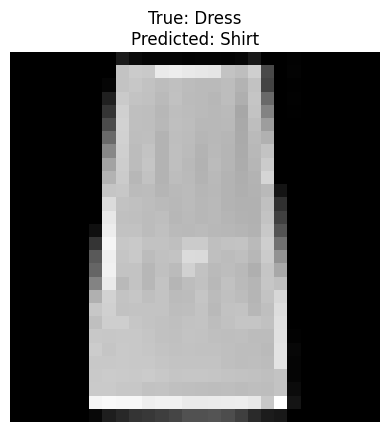

In [21]:
# ---
# 9. Make Predictions on New Data
def preprocess_image(image):
    # For real-world deployment, add resizing/normalization logic
    return image.reshape(1, 28, 28, 1) / 255.0

# Sample prediction
sample_idx = 42
sample_image = test_images[sample_idx]
prediction = loaded_model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_class = np.argmax(prediction)

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True: {class_names[y_true[sample_idx]]}\nPredicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

# Deployment with Gradio (Optional)

In [16]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00


In [28]:
# ---
# 10. Deployment with Gradio (Optional)
import gradio as gr

def classify_image(image):
  global loaded_model  # Declare loaded_model as global
  # If loaded_model is not loaded yet
  if loaded_model is None:
    loaded_model = models.load_model('fashion_mnist_cnn.h5')  # Load the model here

  # Convert to grayscale and preprocess
  image = image.reshape(28, 28, 1)
  image = preprocess_image(image)
  prediction = loaded_model.predict(image).flatten()
  return {class_names[i]: float(prediction[i]) for i in range(10)}

# Initialize loaded_model as None
loaded_model = None


# Create Gradio interface
# Remove the 'shape' argument and potentially use 'image_mode' or 'type' if needed
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(image_mode="L"),  # Or gr.Image(image_mode="L") for grayscale
    outputs=gr.Label(num_top_classes=3),
    examples=[test_images[i].squeeze() for i in range(3)]
)


interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86c4a9bc0de91e3607.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Conclusion and Next Steps

In [ ]:
# ---
# 11. Conclusion and Next Steps
"""
Next Steps:
1. Hyperparameter tuning (learning rate, dropout rate)
2. Data augmentation (rotation, zoom)
3. Try advanced architectures (ResNet, MobileNet)
4. Deploy to cloud (AWS Lambda, TF Serving)
"""